In [1]:
import pandas as pd
path = '../데이터/2020빅콘테스트 데이터분석분야-퓨쳐스리그_스포츠투아이_제공데이터(.CSV)_시즌별, 시트별 구분/'

In [2]:
hitter_2016 = pd.read_csv(path + '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2016.csv', encoding='utf-8-sig')
hitter_2017 = pd.read_csv(path + '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2017.csv', encoding='utf-8-sig')
hitter_2018 = pd.read_csv(path + '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2018.csv', encoding='utf-8-sig')
hitter_2019 = pd.read_csv(path + '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2019.csv', encoding='utf-8-sig')
hitter_2020 = pd.read_csv(path + '2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2020.csv', encoding='utf-8-sig')
hitter_list = [hitter_2016, hitter_2017, hitter_2018, hitter_2019, hitter_2020]
hitter = pd.concat(hitter_list)

In [3]:
hitter_2016

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,BAT_ORDER_NO,PA,...,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
0,20160401HHLG0,20160401,HH,LG,0,T,60404,0,3,1,...,0,0,0,0,0,0,1,0.0,0,0
1,20160401HHLG0,20160401,LG,HH,0,B,61102,1,8,3,...,0,0,0,2,0,0,0,0.0,0,0
2,20160401HHLG0,20160401,LG,HH,0,B,61186,1,7,4,...,0,0,0,1,0,0,0,1.0,1,1
3,20160401HHLG0,20160401,LG,HH,0,B,62164,0,9,1,...,1,0,0,0,0,0,0,0.0,0,0
4,20160401HHLG0,20160401,HH,LG,0,T,62700,1,9,2,...,0,0,0,0,0,1,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18679,20161009WOLT0,20161009,WO,LT,0,T,78168,1,1,4,...,1,0,0,0,1,1,1,1.0,1,1
18680,20161009WOLT0,20161009,LT,WO,0,B,78513,1,1,3,...,0,0,0,0,1,0,0,0.0,0,0
18681,20161009WOLT0,20161009,WO,LT,0,T,79130,0,5,1,...,0,0,0,1,0,0,0,0.0,1,0
18682,20161009WOLT0,20161009,WO,LT,0,T,79300,1,7,4,...,0,0,0,0,0,0,1,0.0,0,0


In [4]:
new_columns = "게임키,일자,팀코드,상대팀코드,더블헤더코드,초말,선수코드,선발,타순,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,희타,희비,4구,고4,사구,삼진,병살타,실책,잔루,득점권타율,득점권타수,득점권안타"
new_columns = new_columns.split(',')
for hitter_i in hitter_list:
    hitter_i.columns = new_columns

In [5]:
hitter_2016['일자'] = pd.to_datetime(hitter_2016['일자'],format='%Y%m%d', errors='raise')
hitter_2016['시즌'] = hitter_2016['일자'].dt.year

In [8]:
hitter_2016[['선수코드', '일자','타자', '타수', '안타', '2루타', '3루타', '홈런', '4구', '고4', '사구']]

,선수코드,일자,타자,타수,안타,2루타,3루타,홈런,4구,고4,사구
0,60404,2016-04-01,1,1,1,0,0,0,0,0,0
1,61102,2016-04-01,3,3,0,0,0,0,0,0,0
2,61186,2016-04-01,4,4,3,0,0,1,0,0,0
3,62164,2016-04-01,1,0,0,0,0,0,1,0,0
4,62700,2016-04-01,2,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18679,78168,2016-10-09,4,3,1,0,0,0,1,0,0
18680,78513,2016-10-09,3,3,0,0,0,0,0,0,0
18681,79130,2016-10-09,1,1,0,0,0,0,0,0,0
18682,79300,2016-10-09,4,4,2,0,0,0,0,0,0


In [9]:
# 단타 구하기
hitter_2016['단타'] = hitter_2016['안타'] - (hitter_2016['2루타'] + hitter_2016['3루타'] + hitter_2016['홈런'])

In [11]:
hitter_2016[['선수코드', '일자','타자', '타수', '안타', '2루타', '3루타', '홈런', '4구', '고4', '사구','단타']]

,선수코드,일자,타자,타수,안타,2루타,3루타,홈런,4구,고4,사구,단타
0,60404,2016-04-01,1,1,1,0,0,0,0,0,0,1
1,61102,2016-04-01,3,3,0,0,0,0,0,0,0,0
2,61186,2016-04-01,4,4,3,0,0,1,0,0,0,2
3,62164,2016-04-01,1,0,0,0,0,0,1,0,0,0
4,62700,2016-04-01,2,2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18679,78168,2016-10-09,4,3,1,0,0,0,1,0,0,1
18680,78513,2016-10-09,3,3,0,0,0,0,0,0,0,0
18681,79130,2016-10-09,1,1,0,0,0,0,0,0,0,0
18682,79300,2016-10-09,4,4,2,0,0,0,0,0,0,2


## ops 구하기 위한 출루율 장타율
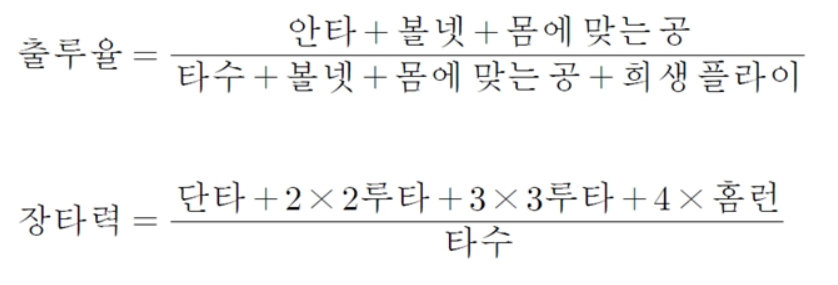

In [53]:
def runBaseP(row):
    previous = hitter_2016[(hitter_2016['선수코드'] == row['선수코드']) & (hitter_2016['일자'] < row['일자'])]
    if len(previous) == 0:
        row['출루율'] = 0
        return row
    previous_sum = previous.sum()
    up = previous_sum['안타'] + previous_sum['4구']  + previous_sum['사구']
    down = previous_sum['사구'] + previous_sum['타수'] + previous_sum['4구'] + previous_sum['희비']
    if down == 0:
        row['출루율'] = 0
        return row
    row['출루율'] = up / down
    return row
hitter_2016 = hitter_2016.apply(runBaseP, axis=1)

In [54]:
hitter_2016

,게임키,일자,팀코드,상대팀코드,더블헤더코드,초말,선수코드,선발,타순,타자,...,실책,잔루,득점권타율,득점권타수,득점권안타,시즌,단타,출루율,장타력,ops
0,20160401HHLG0,2016-04-01,HH,LG,0,T,60404,0,3,1,...,0,1,0.0,0,0,2016,1,0.000000,0.000000,0.000000
1,20160401HHLG0,2016-04-01,LG,HH,0,B,61102,1,8,3,...,0,0,0.0,0,0,2016,0,0.000000,0.000000,0.000000
2,20160401HHLG0,2016-04-01,LG,HH,0,B,61186,1,7,4,...,0,0,1.0,1,1,2016,2,0.000000,0.000000,0.000000
3,20160401HHLG0,2016-04-01,LG,HH,0,B,62164,0,9,1,...,0,0,0.0,0,0,2016,0,0.000000,0.000000,0.000000
4,20160401HHLG0,2016-04-01,HH,LG,0,T,62700,1,9,2,...,1,0,0.0,0,0,2016,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18679,20161009WOLT0,2016-10-09,WO,LT,0,T,78168,1,1,4,...,1,1,1.0,1,1,2016,1,0.405321,0.441652,0.848828
18680,20161009WOLT0,2016-10-09,LT,WO,0,B,78513,1,1,3,...,0,0,0.0,0,0,2016,0,0.348624,0.395833,0.744457
18681,20161009WOLT0,2016-10-09,WO,LT,0,T,79130,0,5,1,...,0,0,0.0,1,0,2016,0,0.320513,0.276923,0.597436
18682,20161009WOLT0,2016-10-09,WO,LT,0,T,79300,1,7,4,...,0,1,0.0,0,0,2016,2,0.346939,0.436782,0.783720


In [14]:
def longHitP(row):
    previous = hitter_2016[(hitter_2016['선수코드'] == row['선수코드']) & (hitter_2016['일자'] < row['일자'])]
    if len(previous) == 0:
        row['장타력'] = 0
        return row
    previous_sum = previous.sum()
    up = previous_sum['단타'] * 1 + previous_sum['2루타'] * 2 + previous_sum['3루타'] * 3 + previous_sum['홈런'] * 4
    down = previous_sum['타수']
    if down == 0:
        row['장타력'] = 0
        return row
    row['장타력'] = up / down
    return row
hitter_2016 = hitter_2016.apply(longHitP, axis=1)

In [55]:
hitter_2016['ops'] = hitter_2016['출루율'] + hitter_2016['장타력']